In [2]:
# Document 
import cv2
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from skimage.measure import label
# import ImageBlur as blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


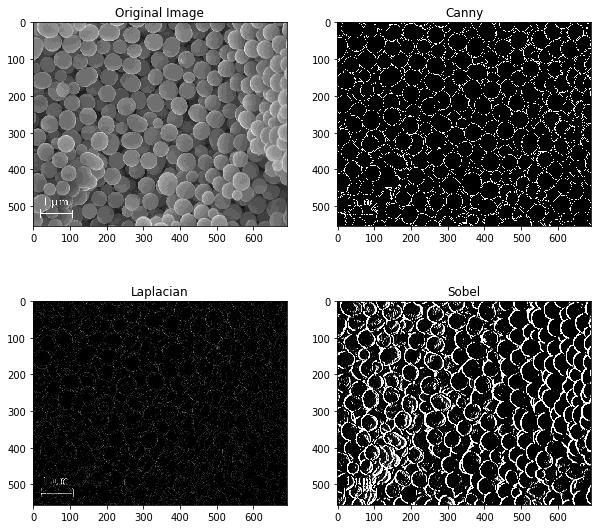

In [2]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(hspace = 0.05)

img = cv2.imread('Opal_Tecopa_near_gem.jpg')

canny = cv2.Canny(img, 70, 100, 3, L2gradient=True)
laplacian = cv2.Laplacian(img, cv2.CV_16S, 5)
sobelx = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=5)

axes[0,0].imshow(img)
axes[0,0].set_title('Original Image')

axes[0,1].imshow(canny, cmap='gray')
axes[0,1].set_title('Canny')

axes[1,0].imshow(laplacian, cmap='gray')
axes[1,0].set_title('Laplacian')

axes[1,1].imshow(sobelx, cmap='gray')
axes[1,1].set_title('Sobel')

plt.show()

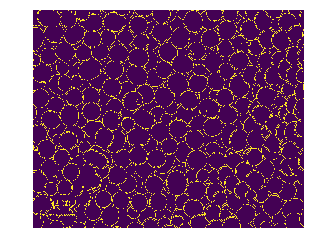

In [7]:
# Starting to work on defining the regions of each particles

clean_particles = remove_small_objects(canny)
plt.imshow(canny)
plt.axis('off')

particles_def = label(canny)

In [8]:
particles_def

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from skimage.measure import regionprops
import pandas as pd

# props = regionprops((labeled image), (raw intensity image))
props = regionprops(particles_def, intensity_image=img)
x = np.zeros(len(props))
y = np.zeros(len(props))
area = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props))

# Use this to pull out the relevant information and save to Pandas dataframe
counter = 0
for prop in props:
    x[counter] = prop.centroid[0]
    y[counter] = prop.centroid[1]
    area[counter] = prop.area
    perim[counter] = prop.perimeter
    intensity[counter] = prop.mean_intensity

ValueError: Label and intensity image must have thesame shape.

In [13]:
img.shape

(556, 691, 3)

In [14]:
canny.shape

(556, 691)